# ANPA
## Fall 2020
### Quantum Computing with Qiskit
#### Lecture 2
#### August, 25th 2020

### Week 1: Review

### X-Gate

The X-gate is represented by the Pauli-X matrix:

$$ X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} = |0\rangle\langle1| + |1\rangle\langle0| $$

To see the effect a gate has on a qubit, we simply multiply the qubit’s statevector by the gate. We can see that the X-gate switches the amplitudes of the states $|0\rangle$ and $|1\rangle$:

$$ X|0\rangle = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix} = |1\rangle$$

$$ X|1\rangle = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \end{bmatrix} = |0\rangle$$


* Bit-flip
* Not-gate
* rotation around x-axis by $\pi$
![PauliX](figures/PauliX.gif)

### Y-Gate
The Y-gate is represented by the Pauli-Y matrix:

$$ Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} = i.\sigma_x.\sigma_z $$

$$ Y|0\rangle = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}\begin{bmatrix} 1 \\ 0 \end{bmatrix} = i \begin{bmatrix} 0 \\ 1 \end{bmatrix} = i|1\rangle$$

$$ Y|1\rangle = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}\begin{bmatrix} 0 \\ 1 \end{bmatrix} = -i \begin{bmatrix} 1 \\ 0 \end{bmatrix} = -i|0\rangle$$

* bit and phase-flip
![PauliY](figures/PauliY.gif)

### Z-Gate
The Z-gate is represented by the Pauli-Z matrix:

$$ Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} = |0\rangle\langle 0| - |1\rangle\langle 1| $$

To see the effect a gate has on a qubit, we simply multiply the qubit’s statevector by the gate. We can see that the X-gate switches the amplitudes of the states $|0\rangle$ and $|1\rangle$:

$$ Z|0\rangle = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \end{bmatrix} = |0\rangle$$

$$Z|1\rangle = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}\begin{bmatrix} 0 \\ 1 \end{bmatrix} = -\begin{bmatrix} 0 \\ 1 \end{bmatrix} = -|1\rangle$$

* phase flip
* rotation around z- axis by $\pi$
![PauliZ](figures/PauliZ.gif)

### Hadamard Gate


The Hadamard gate (H-gate) is a fundamental quantum gate. It allows us to move away from the poles of the Bloch sphere and create a superposition of $|0\rangle$ and $|1\rangle$. It has the matrix:

$$ H = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} $$

We can see that this performs the transformations below:

$$ H|0\rangle = |+\rangle $$

$$ H|1\rangle = |-\rangle $$

This can be thought of as a rotation around the Bloch vector `[1,0,1]` (the line between the x & z-axis), or as transforming the state of the qubit between the X and Z bases.

![Hadamard](figures/hadamard.gif)

### Q-Sphere
Credit: Elisa Baumer
Qiskit Summer School 2020
![Qsphere](figures/Qsphere.jpg)

### Let's Explore IBM Quantum Computer
[IBM Quantum Computer](https://www.ibm.com/quantum-computing/learn/what-is-quantum-computing/)

### Hadamard and CNOT
![Hadamard and CNOT](figures/HandCnot.jpeg)

### Bell States
![Bell States](figures/BellStates.jpeg)

Probability theory is a cornerstone for machine learning. We can think of quantum states as probability distributions with certain properties that make them different from our classical notion of probabilities. Contrasting these properties is an easy and straightforward introduction to the most basic concepts we need in quantum computing.

Apart from probability theory, linear algebra is also critical for many learning protocols. As we will see, geometry and probabilities are intrinsically linked in quantum computing, but geometric notions are also familiar in dealing with classical probability distributions. This notebook first talks about classical probabilities and stochastic vectors, and introduces quantum states as a natural generalization.

Throughout this course, we will assume finite probability distributions and finite dimensional spaces. This significantly simplifies notation and most quantum computers operate over finite dimensional spaces, so we do not lose much in generality.


# Classical probability distributions

Let us toss a biased coin. Without getting too technical, we can associate a random variable $X$ with the output: it takes the value 0 for heads and the value 1 for tails. We get heads with probability $P(X=0) = p_0$ and tails with $P(X=1) = p_1$ for each toss of the coin. In classical, Kolmogorovian probability theory, $p_i\geq 0$ for all $i$, and the probabilities sum to one: $\sum_i p_i = 1$. Let's sample this distribution

In [2]:
import numpy as np
n_samples = 100
p_1 = 0.2
x_data = np.random.binomial(1, p_1, (n_samples,))
print(x_data)

[0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0
 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0]


We naturally expect that the empirically observed frequencies also sum to one:

In [3]:
frequency_of_zeros, frequency_of_ones = 0, 0
for x in x_data:
    if x:
        frequency_of_ones += 1/n_samples
    else:
        frequency_of_zeros += 1/n_samples
print(frequency_of_ones+frequency_of_zeros)

1.0000000000000004


Since $p_0$ and $p_1$ must be non-negative, all possible probability distributions are restricted to the positive orthant. The normalization constraint puts every possible distribution on a straight line. This plot describes all possible probability distributions by biased and unbiased coins.

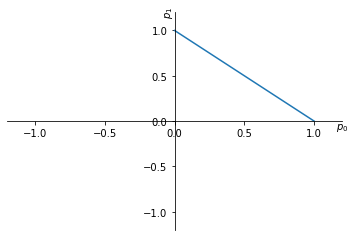

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
p_0 = np.linspace(0, 1, 100)
#print(p_0)
p_1 = 1-p_0
#print(p_1)
fig, ax = plt.subplots()
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.set_xlabel("$p_0$")
ax.xaxis.set_label_coords(1.0, 0.5)
ax.set_ylabel("$p_1$")
ax.yaxis.set_label_coords(0.5, 1.0)
plt.plot(p_0, p_1)

We may also arrange the probabilities in a vector $\vec{p} = \begin{bmatrix} p_0 \\ p_1 \end{bmatrix}$. Here, for notational convenience, we put an arrow above the variable representing the vector, to distinguish it from scalars. You will see that quantum states also have a standard notation that provides convenience, but goes much further in usefulness than the humble arrow here.

A vector representing a probability distribution is called a *stochastic vector*. The normalization constraint essentially says that the norm of the vector is restricted to one in the $l_1$ norm. In other words, $||\vec{p}||_1 = \sum_i |p_i| = 1$. This would be the unit circle in the $l_1$ norm, but since $p_i\geq 0$, we are restricted to a quarter of the unit circle, just as we plotted above. We can easily verify this with numpy's norm function:

In [9]:
p = np.array([[0.7], [0.3]])
np.linalg.norm(p, ord=1)

1.0

We know that the probability of heads is just the first element in the $\vec{p}$, but since it is a vector, we could use linear algebra to extract it. Geometrically, it means that we project the vector to the first axis. This projection is described by the matrix $\begin{bmatrix} 1 & 0\\0 & 0\end{bmatrix}$. The length in the $l_1$ norm gives the sought probability:

In [10]:
Π_0 = np.array([[1, 0], [0, 0]])
np.linalg.norm(Π_0 @ p, ord=1)

0.7

We can repeat the process to get the probability of tails:

In [11]:
Π_1 = np.array([[0, 0], [0, 1]])
np.linalg.norm(Π_1 @ p, ord=1)

0.3

The two projections play an equivalent role to the values 0 and 1 when we defined the probability distribution. In fact, we could define a new random variable called $\Pi$ that can take the projections $\Pi_0$ and $\Pi_1$ as values and we would end up with an identical probability distribution. This may sound convoluted and unnatural, but the measurement in quantum mechanics is essentially a random variable that takes operator values, such as projections.

What happens when we want to transform a probability distribution to another one? For instance, to change the bias of a coin, or to describe the transition of a Markov chain. Since the probability distribution is also a stochastic vector, we can apply a matrix on the vector, where the matrix has to fulfill certain conditions. A left *stochastic matrix* will map stochastic vectors to stochastic vectors when multiplied from the left: its columns add up to one. In other words, it maps probability distributions to probability distributions. For example, starting with a unbiased coin, the map $M$ will transform the distribution to a biased coin:

In [12]:
p = np.array([[.5], [.5]])
M = np.array([[0.7, 0.6], [0.3, 0.4]])
np.linalg.norm(M @ p, ord=1)

0.9999999999999999

One last concept that will come handy is entropy. A probability distribution's entropy is defined as $H(p) = - \sum_i p_i \log_2 p_i$. Let us plot it over all possible probability distributions of coin tosses:

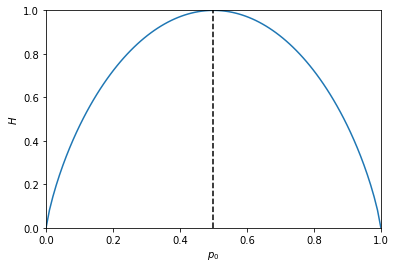

In [13]:
ϵ = 10e-10
p_0 = np.linspace(ϵ, 1-ϵ, 100)
p_1 = 1-p_0
H = -(p_0*np.log2(p_0) + p_1*np.log2(p_1))
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, -np.log2(0.5))
ax.set_xlabel("$p_0$")
ax.set_ylabel("$H$")
plt.plot(p_0, H)
plt.axvline(x=0.5, color='k', linestyle='--')

Here we can see that the entropy is maximal for the unbiased coin. This is true in general: the entropy peaks for the uniform distribution. In a sense, this is the most unpredictable distribution: if we get heads with probability 0.2, betting tails is a great idea. On the other hand, if the coin is unbiased, then a deterministic strategy is of little help in winning. Entropy quantifies this notion of surprise and unpredictability.

# Quantum states

A classical coin is a two-level system: it is either heads or tails. At a first look a quantum state is a probability distribution, and the simplest case is a two-level state, which we call a qubit. Just like the way we can write the probability distribution as a column vector, we can write a quantum state as a column vector. For notational convenience that will become apparent later, we write the label of a quantum state in what is called a ket in the Dirac notation. So for instance, for some qubit, we can write 

$$
|\psi\rangle = \begin{bmatrix}
    a_0 \\
    a_1 \\
\end{bmatrix}.
$$

In other words, a ket is just a column vector, exactly like the stochastic vector in the classical case. Instead of putting an arrow over the name of the variable to express that it is a vector, we use the ket to say that it is a column vector that represents a quantum state. There's more to this notation, as we will see.

The key difference to classical probability distributions and stochastic vectors is the normalization constraint. The square sum of their absolute values adds up to 1:

$$
\sqrt{|a_0|^2+|a_1|^2}=1,
$$

where $a_0, a_1\in \mathbb{C}$. In other words, we are normalizing in the $l_2$ norm instead of the $l_1$ norm. Furthermore, we are no longer restricted to the positive orthant: the components of the quantum state vector, which we call *probability amplitudes*, are complex valued.

Let us introduce two special qubits, corresponding to the canonical basis vectors in two dimensions: $|0\rangle$ and $|1\rangle$.

$$
|0\rangle = \begin{bmatrix}
    1 \\
    0 \\
\end{bmatrix}, \,\,\, |1\rangle = \begin{bmatrix}
    0 \\
    1 \\
\end{bmatrix}.
$$

This basis is also called the computational basis in quantum computing.

We can expand an arbitrary qubit state in this basis:

$$
|\psi\rangle = \begin{bmatrix}
    a_0 \\
    a_1 \\
\end{bmatrix}=a_0\begin{bmatrix}
    1 \\
    0 \\
\end{bmatrix} + 
a_1\begin{bmatrix}
    0 \\
    1 \\
\end{bmatrix}=
a_0|0\rangle+a_1|1\rangle.
$$

This expansion in a basis is called a superposition. If we sample the qubit state, we obtain the outcome 0 with probability $|a_0|^2$, and 1 with probability $|a_1|^2$. This is known as the Born rule; you will learn more about measurements and this rule in a subsequent notebook.

For now, let's take a look at how we can simulate classical coin tossing on a quantum computer. Let's start with a completely biased case where we get heads with probability 1. This means that our qubit $|\psi\rangle=|0\rangle$. We create a circuit of a single qubit and a single classical register where the results of the sampling (measurements) go.

We can see we have equal probability of measuring either $|0\rangle$ or $|1\rangle$. To explain this, we need to talk about measurement.

## 2. The Rules of Measurement <a id="rules-measurement"></a>
### 2.1 A Very Important Rule <a id="important-rule"></a>

There is a simple rule for measurement. To find the probability of measuring a state $|\psi \rangle$ in the state $|x\rangle$ we do:

$$p(|x\rangle) = | \langle \psi| x \rangle|^2$$

The symbols $\langle$ and $|$ tell us $\langle \psi |$ is a row vector. In quantum mechanics we call the column vectors _kets_ and the row vectors _bras._ Together they make up _bra-ket_ notation. Any ket $|a\rangle$ has a corresponding bra $\langle a|$, and we convert between them using the conjugate transpose.

<details>
  <summary>Reminder: The Inner Product (Click here to expand)</summary>
    <p>There are different ways to multiply vectors, here we use the <i>inner product</i>. The inner product is a generalisation of the <i>dot product</i> which you may already be familiar with. In this guide, we use the inner product between a bra (row vector) and a ket (column vector), and it follows this rule:
        
$$\langle a| = \begin{bmatrix}a_0^*, & a_1^*, & \dots & a_n^* \end{bmatrix}, \quad
    |b\rangle = \begin{bmatrix}b_0 \\ b_1 \\ \vdots \\ b_n \end{bmatrix}$$
    $$\langle a|b\rangle = a_0^* b_0 + a_1^* b_1 \dots a_n^* b_n$$
    </p>
  <p>We can see that the inner product of two vectors always gives us a scalar. A useful thing to remember is that the inner product of two orthogonal vectors is 0, for example if we have the orthogonal vectors $|0\rangle$ and $|1\rangle$:
    $$\langle1|0\rangle = \begin{bmatrix} 0 , & 1\end{bmatrix}\begin{bmatrix}1 \\ 0\end{bmatrix} = 0$$
    </p>
  <p>Additionally, remember that the vectors $|0\rangle$ and $|1\rangle$ are also normalised (magnitudes are equal to 1):
    
$$
      \begin{aligned} 
      \langle0|0\rangle & = \begin{bmatrix} 1 , & 0\end{bmatrix}\begin{bmatrix}1 \\ 0\end{bmatrix} = 1 \\
      \langle1|1\rangle & = \begin{bmatrix} 0 , & 1\end{bmatrix}\begin{bmatrix}0 \\ 1\end{bmatrix} = 1
      \end{aligned}
$$
   </p>
</details>

In the equation above, $|x\rangle$ can be any qubit state. To find the probability of measuring $|x\rangle$, we take the inner product of $|x\rangle$ and the state we are measuring (in this case $|\psi\rangle$), then square the magnitude. This may seem a little convoluted, but it will soon become second nature.

If we look at the state $|q_0\rangle$ from before, we can see the probability of measuring $|0\rangle$ is indeed $0.5$:

$$
\begin{aligned}
|q_0\rangle & = \tfrac{1}{\sqrt{2}}|0\rangle + \tfrac{i}{\sqrt{2}}|1\rangle \\
\langle q_0| & = \tfrac{1}{\sqrt{2}}\langle0| - \tfrac{i}{\sqrt{2}}\langle 1| \\
\langle q_0| 0 \rangle  & = \tfrac{1}{\sqrt{2}}\langle 0|0\rangle - \tfrac{i}{\sqrt{2}}\langle 1|0\rangle \\
\langle q_0| 0 \rangle  & = \tfrac{1}{\sqrt{2}}\cdot 1 -  \tfrac{i}{\sqrt{2}} \cdot 0\\
\langle q_0| 0 \rangle  & = \tfrac{1}{\sqrt{2}}\\
|\langle q_0| 0 \rangle|^2 & = \tfrac{1}{2}
\end{aligned}
$$

You should verify the probability of measuring $|1\rangle$ as an exercise.

This rule governs how we get information out of quantum states. It is therefore very important for everything we do in quantum computation. It also immediately implies several important facts.

### 2.2 The Implications of this Rule <a id="implications"></a>
### #1 Normalisation

The rule shows us that amplitudes are related to probabilities. If we want the probabilities to add up to 1 (which they should!), we need to ensure that the statevector is properly normalized. Specifically, we need the magnitude of the state vector to be 1.

$$ \langle\psi|\psi\rangle = 1 \\ $$

Thus if:

$$ |\psi\rangle = \alpha|0\rangle + \beta|1\rangle $$

Then:

$$ \sqrt{|\alpha|^2 + |\beta|^2} = 1 $$

This explains the factors of $\sqrt{2}$ you have seen throughout this chapter. In fact, if we try to give `initialize()` a vector that isn’t normalised, it will give us an error:

In [4]:
from qiskit import QuantumCircuit, execute,QuantumCircuit, ClassicalRegister, QuantumRegister, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector,plot_bloch_multivector,plot_state_qsphere
from math import sqrt, pi
import numpy as np
%matplotlib inline

In Qiskit, we use the `QuantumCircuit` object to store our circuits, this is essentially a list of the quantum gates in our circuit and the qubits they are applied to.

In [5]:
qc = QuantumCircuit(1) # Create a quantum circuit with one qubit

In our quantum circuits, our qubits always start out in the state $|0\rangle$. We can use the `initialize()` method to transform this into any state. We give `initialize()` the vector we want in the form of a list, and tell it which qubit(s) we want to initialise in this state:

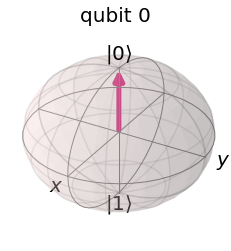

In [6]:
backend = Aer.get_backend('statevector_simulator') # Tell Qiskit how to simulate our circuit
job = execute(qc,backend).result() # Do the simulation, returning the state vector
plot_bloch_multivector(job.get_statevector()) # Display the output state vector

In [8]:
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.draw()# Let's view our circuit

┌─────────────────┐
q_0: ┤ initialize(0,1) ├
     └─────────────────┘

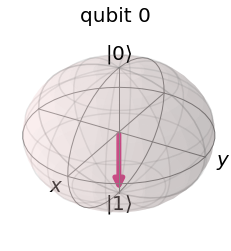

In [9]:
result = execute(qc,backend).result() # Do the simulation, returning the state vector
plot_bloch_multivector(result.get_statevector()) # Display the output state vector

from `result`, we can then get the final statevector using `.get_statevector()`:

In [10]:
out_state = result.get_statevector()
print(out_state) # Display the output state vector

[0.+0.j 1.+0.j]


**Note:** Python uses `j` to represent $i$ in complex numbers. We see a vector with two complex elements: `0.+0.j` = 0, and `1.+0.j` = 1.

Let’s now measure our qubit as we would in a real quantum computer and see the result:

In [11]:
qc.measure_all()
qc.draw()

┌─────────────────┐ ░ ┌─┐
   q_0: ┤ initialize(0,1) ├─░─┤M├
        └─────────────────┘ ░ └╥┘
meas_0: ═══════════════════════╩═

This time, instead of the statevector we will get the counts for the `0` and `1` results using `.get_counts()`:

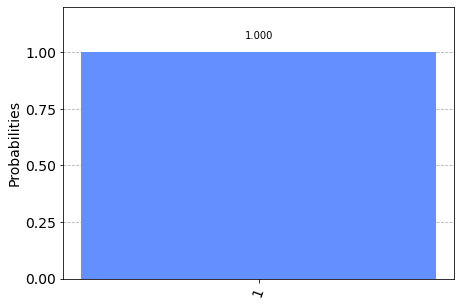

In [12]:
result = execute(qc,backend).result()
counts = result.get_counts()
plot_histogram(counts)

We can see that we (unsurprisingly) have a 100% chance of measuring $|1\rangle$. This time, let’s instead put our qubit into a superposition and see what happens. We will use the state $|q_0\rangle$ from earlier in this section:

$$ |q_0\rangle = \tfrac{1}{\sqrt{2}}|0\rangle + \tfrac{i}{\sqrt{2}}|1\rangle $$

We need to add these amplitudes to a python list. To add a complex amplitude we use `complex`, giving the real and imaginary parts as arguments:

In [13]:
initial_state = [1/sqrt(2), 1j/sqrt(2)]  # Define state |q>

And we then repeat the steps for initialising the qubit as before:

In [14]:
qc = QuantumCircuit(1) # Must redefine qc
qc.initialize(initial_state, 0)# Initialise the 0th qubit in the state `initial_state`
qc.h(0)
qc.draw()

┌──────────────────────────────┐┌───┐
q_0: ┤ initialize(0.70711,0.70711j) ├┤ H ├
     └──────────────────────────────┘└───┘

In [15]:
state = execute(qc,backend).result().get_statevector() # Execute the circuit
print(state) # Print the result

[0.5+0.5j 0.5-0.5j]


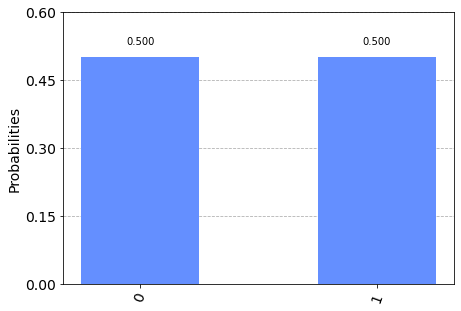

In [17]:
results = execute(qc,backend).result().get_counts()
plot_histogram(results)

In [19]:
vector = [0,1]
qc.initialize(vector, 0)

### #2 Alternative measurement

The measurement rule gives us the probability $p(|x\rangle)$ that a state $|\psi\rangle$ is measured as $|x\rangle$. Nowhere does it tell us that $|x\rangle$ can only be either $|0\rangle$ or $|1\rangle$.

The measurements we have considered so far are in fact only one of an infinite number of possible ways to measure a qubit. For any orthogonal pair of states, we can define a measurement that would cause a qubit to choose between the two.

This possibility will be explored more in the next section. For now, just bear in mind that $|x\rangle$ is not limited to being simply $|0\rangle$ or $|1\rangle$.

### #3 Global Phase

We know that measuring the state $|1\rangle$ will give us the output `1` with certainty. But we are also able to write down states such as 

$$\begin{bmatrix}0 \\ i\end{bmatrix} = i|1\rangle.$$

To see how this behaves, we apply the measurement rule.

$$ |\langle x| (i|1\rangle) |^2 = | i \langle x|1\rangle|^2 = |\langle x|1\rangle|^2 $$

Here we find that the factor of $i$ disappears once we take the magnitude of the complex number. This effect is completely independent of the measured state $|x\rangle$. It does not matter what measurement we are considering, the probabilities for the state $i|1\rangle$ are identical to those for $|1\rangle$. Since measurements are the only way we can extract any information from a qubit, this implies that these two states are equivalent in all ways that are physically relevant.

More generally, we refer to any overall factor $\gamma$ on a state for which $|\gamma|=1$ as a 'global phase'. States that differ only by a global phase are physically indistinguishable.

$$ |\langle x| ( \gamma |a\rangle) |^2 = | \gamma \langle x|a\rangle|^2 = |\langle x|a\rangle|^2 $$

Note that this is distinct from the phase difference _between_ terms in a superposition, which is known as the 'relative phase'. This becomes relevant once we consider different types of measurement and multiple qubits.


### #4 The Observer Effect

We know that the amplitudes contain information about the probability of us finding the qubit in a specific state, but once we have measured the qubit, we know with certainty what the state of the qubit is. For example, if we measure a qubit in the state:

$$ |q\rangle = \alpha|0\rangle + \beta|1\rangle$$

And find it in the state $|0\rangle$, if we measure again, there is a 100% chance of finding the qubit in the state $|0\rangle$. This means the act of measuring _changes_ the state of our qubits.

$$ |q\rangle = \begin{bmatrix} \alpha \\ \beta \end{bmatrix} \xrightarrow{\text{Measure }|0\rangle} |q\rangle = |0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$$

We sometimes refer to this as _collapsing_ the state of the qubit. It is a potent effect, and so one that must be used wisely. For example, were we to constantly measure each of our qubits to keep track of their value at each point in a computation, they would always simply be in a well-defined state of either $|0\rangle$ or $|1\rangle$. As such, they would be no different from classical bits and our computation could be easily replaced by a classical computation. To acheive truly quantum computation we must allow the qubits to explore more complex states. Measurements are therefore only used when we need to extract an output. This means that we often place the all measurements at the end of our quantum circuit. 

We can demonstrate this using Qiskit’s statevector simulator. Let's initialise a qubit in superposition:

In [20]:
qc = QuantumCircuit(1) # Redefine qc
initial_state = [0.+1.j/sqrt(2),1/sqrt(2)+0.j]
qc.initialize(initial_state, 0)
print(initial_state)
qc.draw()

[0.7071067811865475j, (0.7071067811865475+0j)]


┌──────────────────────────────┐
q_0: ┤ initialize(0.70711j,0.70711) ├
     └──────────────────────────────┘

This should initialise our qubit in the state:

$$ |q\rangle = \tfrac{i}{\sqrt{2}}|0\rangle + \tfrac{1}{\sqrt{2}}|1\rangle $$

We can verify this using the simulator:

In [21]:
state = execute(qc, backend).result().get_statevector()
print("Qubit State = " + str(state))

Qubit State = [0.        +0.70710678j 0.70710678+0.j        ]


We can see here the qubit is initialised in the state `[0.+0.70710678j 0.70710678+0.j]`, which is the state we expected.

Let’s now measure this qubit:

In [22]:
qc.measure_all()
qc.draw()

┌──────────────────────────────┐ ░ ┌─┐
   q_0: ┤ initialize(0.70711j,0.70711) ├─░─┤M├
        └──────────────────────────────┘ ░ └╥┘
meas_0: ════════════════════════════════════╩═

When we simulate this entire circuit, we can see that one of the amplitudes is _always_ 0:

In [23]:
state = execute(qc, backend).result().get_statevector()
print("State of Measured Qubit = " + str(state))

State of Measured Qubit = [0.+0.j 1.+0.j]


You can re-run this cell a few times to reinitialise the qubit and measure it again. You will notice that either outcome is equally probable, but that the state of the qubit is never a superposition of $|0\rangle$ and $|1\rangle$. Somewhat interestingly, the global phase on the state $|0\rangle$ survives, but since this is global phase, we can never measure it on a real quantum computer.

### A Note about Quantum Simulators

We can see that writing down a qubit’s state requires keeping track of two complex numbers, but when using a real quantum computer we will only ever receive a yes-or-no (`0` or `1`) answer for each qubit. The output of a 10-qubit quantum computer will look like this:

`0110111110`

Just 10 bits, no superposition or complex amplitudes. When using a real quantum computer, we cannot see the states of our qubits mid-computation, as this would destroy them! This behaviour is not ideal for learning, so Qiskit provides different quantum simulators: The `qasm_simulator` behaves as if you are interacting with a real quantum computer, and will not allow you to use `.get_statevector()`. Alternatively, `statevector_simulator`, (which we have been using in this chapter) does allow peeking at the quantum states before measurement, as we have seen. 


In [77]:

π = np.pi

backend = BasicAer.get_backend('qasm_simulator')

q = QuantumRegister(1)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q, c)

Any qubit is initialized in $|0\rangle$, so if we measure it right away, we should get our maximally biased coin.

In [78]:
circuit.measure(q, c)

Let us execute it a hundred times and study the result

In [79]:
job = execute(circuit, backend, shots=100)

In [80]:
result = job.result()
result.get_counts(circuit)

{'0': 100}

As expected, all of our outcomes are 0. To understand the possible quantum states, we use the Bloch sphere visualization. Since the probability amplitudes are complex and there are two of them for a single qubit, this would require a four-dimensional space. Now since the vectors are normalized, this removes a degree of freedom, allowing a three-dimensional representation with an appropriate embedding. This embedding is the Bloch sphere. It is slightly different than an ordinary sphere in three dimensions: we identify the north pole with the state $|0\rangle$, and the south pole with $|1\rangle$. In other words, two orthogonal vectors appear as if they were on the same axis -- the axis Z. The computational basis is just one basis: the axes X and Y represent two other bases. Any point on the surface of this sphere is a valid quantum state. This is also true the other way around: every pure quantum state is a point on the Bloch sphere. Here it 'pure' is an important technical term and it essentially means that the state is described by a ket (column vector). Later in the course we will see other states called mix states that are not described by a ket (you will see later that these are inside the Bloch sphere).

To make it less abstract, let's plot our $|0\rangle$ on the Bloch sphere:

/opt/anaconda3/lib/python3.7/site-packages/qiskit/util.py:109: DeprecationWarning: The QuantumCircuit.iden() method is deprecated as of 0.14.0, and will be removed no earlier than 3 months after that release date. You should use the QuantumCircuit.i() method instead.
  return func(*args, **kwargs)


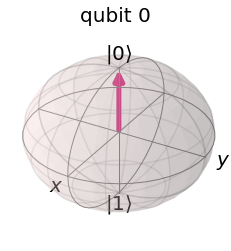

In [81]:
backend_statevector = BasicAer.get_backend('statevector_simulator')
circuit = QuantumCircuit(q, c)
circuit.iden(q[0])
job = execute(circuit, backend_statevector)
plot_bloch_multivector(job.result().get_statevector(circuit))

Compare this sphere with the straight line in the positive orthant that describes all classical probability distributions of coin tosses. You can already see that there is a much richer structure in the quantum probability space.

Let us pick another point on the Bloch sphere, that is, another distribution. Let's transform the state $|0\rangle$ to $\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$. This corresponds to the unbiased coin, since we will get 0 with probability $|\frac{1}{\sqrt{2}}|^2=1/2$, and the other way around. There are many ways to do this transformation. We pick a rotation around the Y axis by $\pi/2$, which corresponds to the matrix $\frac{1}{\sqrt{2}}\begin{bmatrix} 1 & -1\\1 & 1\end{bmatrix}$.

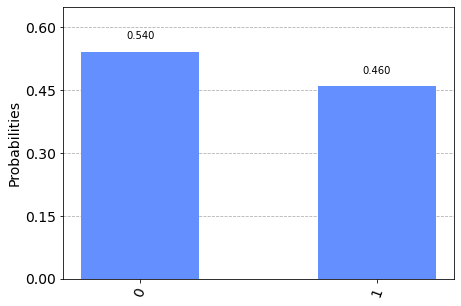

In [86]:
circuit = QuantumCircuit(q, c)
circuit.ry(π/2, q[0])
circuit.measure(q, c)
job = execute(circuit, backend, shots=100)
plot_histogram(job.result().get_counts(circuit))

To get an intuition why it is called a rotation around the Y axis, let's plot it on the Bloch sphere:

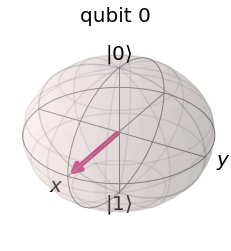

In [87]:
circuit = QuantumCircuit(q, c)
circuit.ry(π/2, q[0])
job = execute(circuit, backend_statevector)
plot_bloch_multivector(job.result().get_statevector(circuit))

It does exactly what it says: it rotates from the north pole of the Bloch sphere.

Why is interesting to have complex probability amplitudes instead of non-negative real numbers? To get some insight, take a look what happens if we apply the same rotation to $|1\rangle$. To achieve this, first we flip $|0\rangle$ to $|1\rangle$ by applying a NOT gate (denoted by X in quantum computing) and then the rotation.

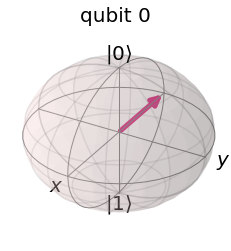

In [55]:
circuit = QuantumCircuit(q, c)
circuit.x(q[0])
circuit.ry(π/2, q[0])
job = execute(circuit, backend_statevector)
plot_bloch_multivector(job.result().get_statevector(circuit))

You can verify that the result is $\frac{1}{\sqrt{2}}(-|0\rangle + |1\rangle)$. That is, the exact same state as before, except that the first term got a minus sign: it is a negative probability amplitude. Note that the difference cannot be observed from the statistics:

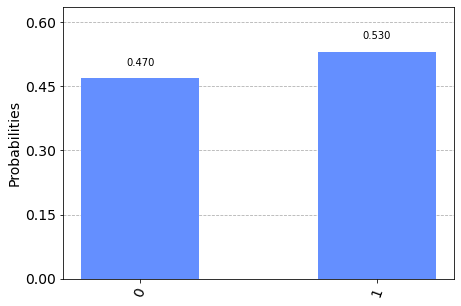

In [56]:
circuit.measure(q, c)
job = execute(circuit, backend, shots=100)
plot_histogram(job.result().get_counts(circuit))

It still looks like an approximately unbiased coin. Yet, that negative sign -- or any complex value -- is what models *interference*, a critically important phenomenon where probability amplitudes can interact in a constructive or a destructive way. To see this, if we apply the rotation twice in a row on $|0\rangle$, we get another deterministic output, $|1\rangle$, although in between the two, it was some superposition. 

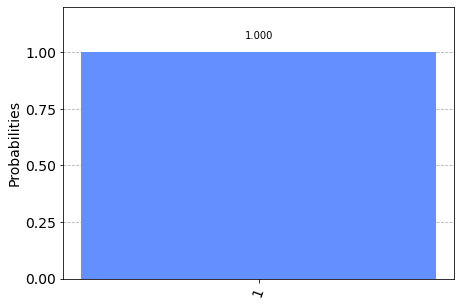

In [57]:
circuit = QuantumCircuit(q, c)
circuit.ry(π/2, q[0])
circuit.ry(π/2, q[0])
circuit.measure(q, c)
job = execute(circuit, backend, shots=100)
plot_histogram(job.result().get_counts(circuit))

Many quantum algorithms exploit interference, for instance, the seminal [Deutsch-Josza algorithm](https://en.wikipedia.org/wiki/Deutsch–Jozsa_algorithm), which is among the simplest to understand its significance.

# More qubits and entanglement

We have already seen that quantum states are probability distributions normed to 1 in the $l_2$ norm and we got a first peek at interference. If we introduce more qubits, we see another crucial quantum effect emerging. To do that, we first have to define how we write down the column vector for describing two qubits. We use a tensor product, which, in the case of qubits, is equivalent to the Kronecker product. Given two qubits, $|\psi\rangle=\begin{bmatrix}a_0\\a_1\end{bmatrix}$ and $|\psi'\rangle=\begin{bmatrix}b_0\\b_1\end{bmatrix}$, their product is $|\psi\rangle\otimes|\psi'\rangle=\begin{bmatrix}a_0b_0\\ a_0b_1\\ a_1b_0\\ a_1b_1\end{bmatrix}$. Imagine that you have two registers $q_0$ and $q_1$, each can hold a qubit, and both qubits are in the state $|0\rangle$. Then this composite state would be described by according to this product rule as follows:

In [19]:
q0 = np.array([[1], [0]])
q1 = np.array([[1], [0]])
np.kron(q0, q1)

array([[1],
       [0],
       [0],
       [0]])

This is the $|0\rangle\otimes|0\rangle$ state, which we often abbreviate as $|00\rangle$. The states $|01\rangle$, $|10\rangle$, and $|11\rangle$ are defined analogously, and the four of them give the canonical basis of the four dimensional complex space, $\mathbb{C}^2\otimes\mathbb{C}^2$.

Now comes the interesting and counter-intuitive part. In machine learning, we also work with high-dimensional spaces, but we never construct it as a tensor product: it is typically $\mathbb{R}^d$ for some dimension $d$. The interesting part of writing the high-dimensional space as a tensor product is that not all vectors in can be written as a product of vectors in the component space.

Take the following state: $|\phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle+|11\rangle)$. This vector is clearly in $\mathbb{C}^2\otimes\mathbb{C}^2$, since it is a linear combination of two of the basis vector in this space. Yet, it cannot be written as $|\psi\rangle\otimes|\psi'\rangle$ for some $|\psi\rangle$, $|\psi'\rangle\in\mathbb{C}^2$.

To see this, assume that it can be written in this form. Then

$$
|\phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle+|11\rangle) = \begin{bmatrix}a_0b_0\\ a_0b_1\\ a_1b_0\\ a_1b_1\end{bmatrix} = a_0b_0|00\rangle + a_0b_1|01\rangle + a_1b_0|10\rangle + a_1b_1|11\rangle.
$$

$|01\rangle$ and $|10\rangle$ do not appear on the left-hand side, so their coefficients must be zero: $a_1b_0=0$ and $a_0b_1=0$. This leads to a contradiction, since $a_1$ cannot be zero ($a_1b_1=1$), so $b_0$ must be zero, but $a_0b_0=1$. Therefore $|\phi^+\rangle$ cannot be written as a product.

States that cannot be written as a product are called entangled states. This is the mathematical form of describing a phenomenon of strong correlations between random variables that exceed what is possible classically. Entanglement plays a central role in countless quantum algorithms. A simple example is [quantum teleportation](https://en.wikipedia.org/wiki/Quantum_teleportation). We will also see its applications in quantum machine learning protocols.

We will have a closer look at entanglement in a subsequent notebook on measurements, but as a teaser, let us look at the measurement statistics of the $|\phi^+\rangle$ state. The explanation of the circuit preparing it will also come in a subsequent notebook.

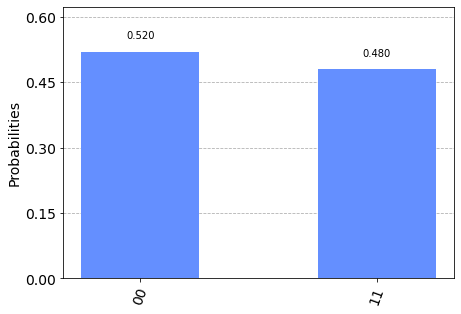

In [20]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
circuit = QuantumCircuit(q, c)
circuit.h(q[0])
circuit.cx(q[0], q[1])
circuit.measure(q, c)
job = execute(circuit, backend, shots=100)
plot_histogram(job.result().get_counts(circuit))

Notice that 01 or 10 never appear in the measurement statistics.

# Further reading

Chapter 9 in Quantum Computing since Democritus by Scott Aaronson describes a similar approach to understanding quantum states -- in fact, the interference example was lifted from there.